In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#read M1, M1V, UIs and Rs
M1 = pd.read_csv("M1.csv")
M1V = pd.read_csv("M1V.csv")

R1 = pd.read_csv("FEDFUNDS.csv") #Effective Federal Funds Rate
R1.rename(columns={'FEDFUNDS':'R1'}, inplace=True)

R2 = pd.read_csv("FF.csv") #FF
R2.rename(columns={'FF':'R2'}, inplace=True)

R3 = pd.read_csv("DLTIIT.csv") #DLTIIT
R3.rename(columns={'DLTIIT':'R3'}, inplace=True)

R = pd.read_csv("DCPF3M.csv") #DCPF3M
R.rename(columns={'DCPF3M':'R'}, inplace=True)

R5 = pd.read_csv("MPRIME.csv") #MPRIME
R5.rename(columns={'MPRIME':'R5'}, inplace=True)

R6 = pd.read_csv("DGS1.csv") #DGS1
R6.rename(columns={'DGS1':'R6'}, inplace=True)

GDP = pd.read_csv("GDP.csv") #Nominal GDP

In [3]:
M1.DATE = pd.to_datetime(M1.DATE)
M1.set_index("DATE", inplace = True)
M1V.DATE = pd.to_datetime(M1V.DATE)
M1V.set_index("DATE", inplace = True)

R1.DATE = pd.to_datetime(R1.DATE)
R1.set_index("DATE", inplace = True)
R2.DATE = pd.to_datetime(R2.DATE)
R2.set_index("DATE", inplace = True)
R3.DATE = pd.to_datetime(R3.DATE)
R3.set_index("DATE", inplace = True)
R.DATE = pd.to_datetime(R.DATE)
R.set_index("DATE", inplace = True)
R5.DATE = pd.to_datetime(R5.DATE)
R5.set_index("DATE", inplace = True)
R6.DATE = pd.to_datetime(R6.DATE)
R6.set_index("DATE", inplace = True)

GDP.DATE = pd.to_datetime(GDP.DATE)
GDP.set_index("DATE", inplace = True)

In [5]:
#get M1 in Qly
M1Qly = M1.resample('QS').sum()
M1VQly = M1V.resample('QS').sum()

R1Qly = R1.resample('QS').sum()
R2Qly = R2.resample('QS').sum()
R3Qly = R3.resample('QS').sum()
RQly = R.resample('QS').sum()
R5Qly = R5.resample('QS').sum()
R6Qly = R6.resample('QS').sum()

GDPQly = GDP.resample('QS').sum()

In [6]:
data = M1Qly.join(M1VQly, how='outer')
#create k by 1/v
data['k'] = 1 / data['M1V']

data = data.join(R1Qly, how='outer')
data = data.join(R2Qly, how='outer')
data = data.join(R3Qly, how='outer')
data = data.join(RQly, how='outer')
data = data.join(R5Qly, how='outer')
data = data.join(R6Qly, how='outer')

data = data.join(GDPQly, how='outer')

In [7]:
#read MPU
MPU = pd.read_excel("US_MPU_monthly.xlsx")
MPU.drop(MPU.tail(1).index,inplace=True)
MPU.rename(columns={'Date':'DATE'}, inplace=True)
MPU.rename(columns={'BBD MPU Index Based on Access World News':'MPUA'}, inplace=True)
MPU.rename(columns={'BBD MPU Index Based on 10 Major Papers':'MPUP'}, inplace=True)
MPU.rename(columns={'HRS US MPU':'MPUUS'}, inplace=True)
MPU.DATE = pd.to_datetime(MPU.DATE)
MPU.set_index("DATE", inplace = True)
MPUQly = MPU.resample('QS').sum()
data = data.join(MPUQly.MPUA, how='outer')
data = data.join(MPUQly.MPUP, how='outer')
data = data.join(MPUQly.MPUUS, how='outer')

In [8]:
#select from 2007
data = data.loc['2007-1-1':'2017-7-30']


In [9]:
data.info()
#no non data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2007-01-01 to 2017-07-01
Freq: QS-JAN
Data columns (total 13 columns):
M1       43 non-null float64
M1V      43 non-null float64
k        43 non-null float64
R1       43 non-null float64
R2       43 non-null float64
R3       43 non-null float64
R        43 non-null float64
R5       43 non-null float64
R6       43 non-null float64
GDP      43 non-null float64
MPUA     43 non-null float64
MPUP     43 non-null float64
MPUUS    43 non-null float64
dtypes: float64(13)
memory usage: 4.7 KB


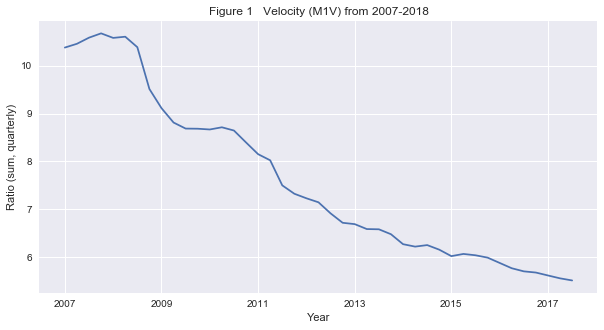

In [10]:
plt.figure(figsize=(10,5))
data.M1V.plot()
plt.xlabel('Year')
plt.ylabel('Ratio (sum, quarterly)')
plt.title('Figure 1   Velocity (M1V) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 1.png')
plt.show()

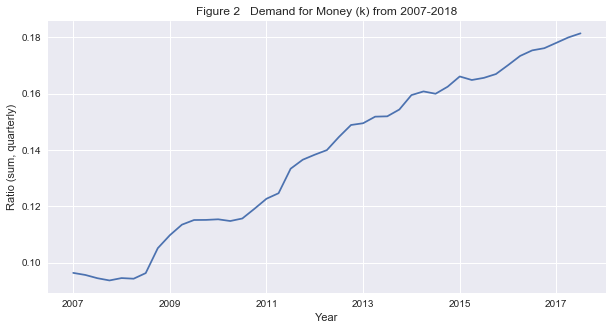

In [11]:
plt.figure(figsize=(10,5))
data.k.plot()
plt.xlabel('Year')
plt.ylabel('Ratio (sum, quarterly)')
plt.title('Figure 2   Demand for Money (k) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 2.png')
plt.show()

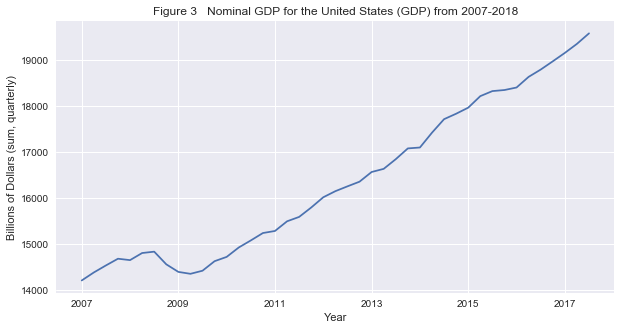

In [12]:
plt.figure(figsize=(10,5))
data.GDP.plot()
plt.xlabel('Year')
plt.ylabel('Billions of Dollars (sum, quarterly)')
plt.title('Figure 3   Nominal GDP for the United States (GDP) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 3.png')
plt.show()

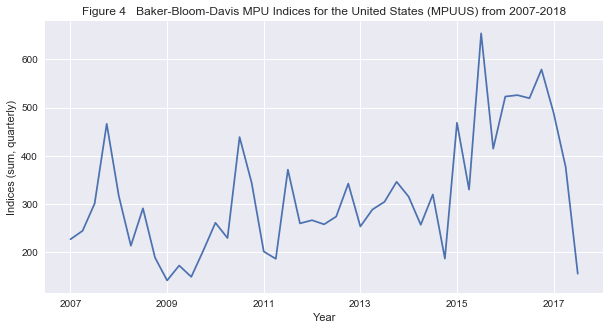

In [13]:
plt.figure(figsize=(10,5))
data.MPUUS.plot()
plt.xlabel('Year')
plt.ylabel('Indices (sum, quarterly)')
plt.title('Figure 4   Baker-Bloom-Davis MPU Indices for the United States (MPUUS) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 4.png')
plt.show()

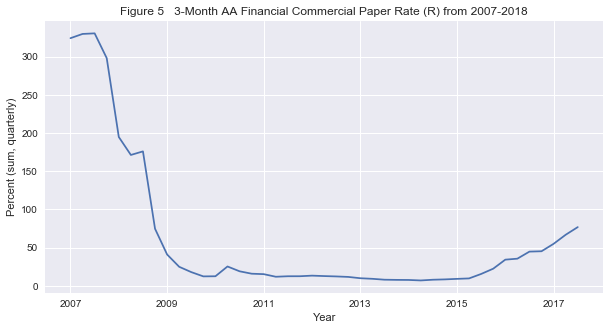

In [15]:
plt.figure(figsize=(10,5))
data.R.plot()
plt.xlabel('Year')
plt.ylabel('Percent (sum, quarterly)')
plt.title('Figure 5   3-Month AA Financial Commercial Paper Rate (R) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 5.png')
plt.show()

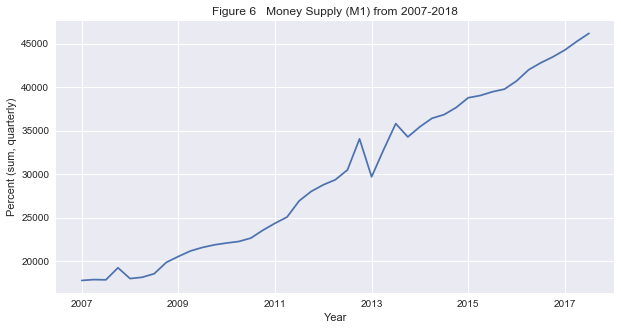

In [16]:
plt.figure(figsize=(10,5))
data.M1.plot()
plt.xlabel('Year')
plt.ylabel('Percent (sum, quarterly)')
plt.title('Figure 6   Money Supply (M1) from 2007-2018')
plt.grid(True)
plt.savefig('Figure 6.png')
plt.show()

In [17]:
X = data[['GDP', 'MPUUS', 'R']]
y = data["k"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print('                  Table 1 Regression of k On GPD, MPUUS and R')
print(model.summary())

                  Table 1 Regression of k On GPD, MPUUS and R
                            OLS Regression Results                            
Dep. Variable:                      k   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2767.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.12e-46
Time:                        16:50:53   Log-Likelihood:                 138.11
No. Observations:                  43   AIC:                            -270.2
Df Residuals:                      40   BIC:                            -264.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------